In [1]:
# package import
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are conistent


In [2]:
X,Y = load_planar_dataset()


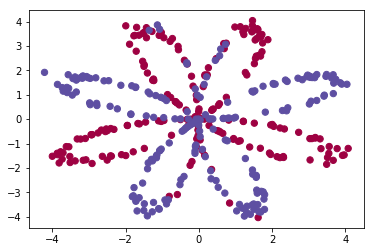

In [3]:
# visualize the data
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)

In [4]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1] # size of the training set

print("The shape of X is :"+ str(shape_X))
print("The shape of Y is :"+ str(shape_Y))
print("I have  %d training examples." %(m))

The shape of X is :(2, 400)
The shape of Y is :(1, 400)
I have  400 training examples.


In [5]:
# 1. train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

逻辑回归的准确性： 47 % (正确标记的数据点所占的百分比)


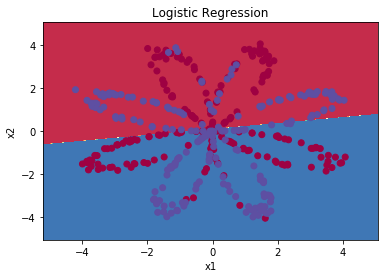

In [6]:
# plot the decision boundary for LR 
plot_decision_boundary(lambda x: clf.predict(x), X, Y) #绘制决策边界
plt.title("Logistic Regression") #图标题
LR_predictions  = clf.predict(X.T) #预测结果
print ("逻辑回归的准确性： %d " % float((np.dot(Y, LR_predictions) + 
        np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       "% " + "(正确标记的数据点所占的百分比)")

In [7]:
# 构建神经网络
# 1.定义结构 2.初始化参数 3. 循环（前向传播，损失计算、反向传播，梯度下降更新参数）

# 1. 定义结构
def layer_sizes(X, Y):
    """
    参数：
        X：训练集(特征数，m)
        Y：标签 (1,m)
    返回值：
    n_x: 输入层的神经元数量
    n_h: 隐藏层的神经元数量
    n_y: the size of the output layer

    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [8]:
# test layer_sizes
X_asses, Y_asses = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_asses, Y_asses)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [9]:
# initialize paramenters
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2) #set up a seed to keep the outputs are the same
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1, "b1":b1, "W2":W2, "b2":b2}
    return parameters
    

In [10]:
# test init_paraments
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = init_parameters(n_x, n_h, n_y)
print("W1=" + str(parameters["W1"]))
print("b1=" + str(parameters["b1"]))
print("W2=" + str(parameters["W2"]))
print("b2=" + str(parameters["b2"]))

NameError: name 'init_parameters' is not defined

In [11]:
# 3. 向前传播
def forward_propagation( X , parameters ):
    """
    参数：
         X - 维度为（n_x，m）的输入数据。
         parameters - 初始化函数（initialize_parameters）的输出

    返回：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型变量
     """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #前向传播计算A2
    Z1 = np.dot(W1 , X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2 , A1) + b2
    A2 = sigmoid(Z2)
    #使用断言确保我的数据格式是正确的
    assert(A2.shape == (1,X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return (A2, cache)

In [12]:
# test forward_propagation
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print("X.shape:" + str(X_assess.shape))
print("Z1:" + str(cache["Z1"]))
print("A1:" + str(cache["A1"]))
print("Z2:" + str(cache["Z2"]))
print("A2:" + str(cache["A2"]))

# just used to compare the result
print(np.mean(cache["Z1"]), np.mean(cache["A1"]), np.mean(cache["Z2"]), np.mean(cache["A2"]))

X.shape:(2, 3)
Z1:[[-0.00616586  0.0020626   0.0034962 ]
 [-0.05229879  0.02726335 -0.02646869]
 [-0.02009991  0.00368692  0.02884556]
 [ 0.02153007 -0.01385322  0.02600471]]
A1:[[-0.00616578  0.0020626   0.00349619]
 [-0.05225116  0.02725659 -0.02646251]
 [-0.02009721  0.0036869   0.02883756]
 [ 0.02152675 -0.01385234  0.02599885]]
Z2:[[ 0.00092281 -0.00056678  0.00095853]]
A2:[[0.5002307  0.49985831 0.50023963]]
-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [13]:
def compute_cost(A2,Y,parameters):
    """
    计算方程（6）中给出的交叉熵成本，

    参数：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         Y - "True"标签向量,维度为（1，数量）
         parameters - 一个包含W1，B1，W2和B2的字典类型的变量

    返回：
         成本 - 交叉熵成本给出方程（13）
    """

    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    #计算成本
    logprobs = logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))

    assert(isinstance(cost,float))

    return cost


In [14]:
# test 
A2, Y_assess, parameters = compute_cost_test_case()
print("cost=" + str(compute_cost(A2,Y_assess,parameters)))

cost=0.6929198937761266


In [15]:
# backward_propagation
def backward_propagation(parameters,cache,X,Y):
    """
    使用上述说明搭建反向传播函数。

    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（2，数量）
     Y - “True”标签，维度为（1，数量）

    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2 }

    return grads


In [16]:
# test
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))


dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [17]:
# update parameters
# 使用(dW1, db1, dW2, db2)来更新(W1, b1, W2, b2)
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
# test
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [19]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [20]:
#test
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


W1 = [[-4.18494482  5.33220319]
 [-7.52989354  1.24306197]
 [-4.19295428  5.32631786]
 [ 7.52983748 -1.24309404]]
b1 = [[ 2.32926815]
 [ 3.7945905 ]
 [ 2.33002544]
 [-3.79468791]]
W2 = [[-6033.83672179 -6008.12981272 -6033.10095329  6008.06636901]]
b2 = [[-52.66607704]]


In [21]:
# predict
def predict(parameters,X):
    A2 , cache = forward_propagation(X,parameters)
    predictions = np.round(A2)

    return predictions

In [22]:
#test
parameters, X_assess = predict_test_case()

predictions = predictions = predict(parameters,X_assess)
print(str(predictions))
print("predict.mean=" + str(np.mean(predictions)))

[[1. 0. 1.]]
predict.mean=0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219504
Cost after iteration 9000: 0.218571
准确率: 90%


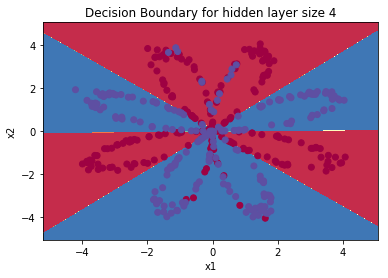

In [23]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#绘制边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

predictions = predict(parameters, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')


隐藏层的节点数量：1准确率: 67.5
隐藏层的节点数量：2准确率: 67.25
隐藏层的节点数量：3准确率: 90.75
隐藏层的节点数量：4准确率: 90.5
隐藏层的节点数量：5准确率: 91.25
隐藏层的节点数量：20准确率: 90.0
隐藏层的节点数量：50准确率: 90.75


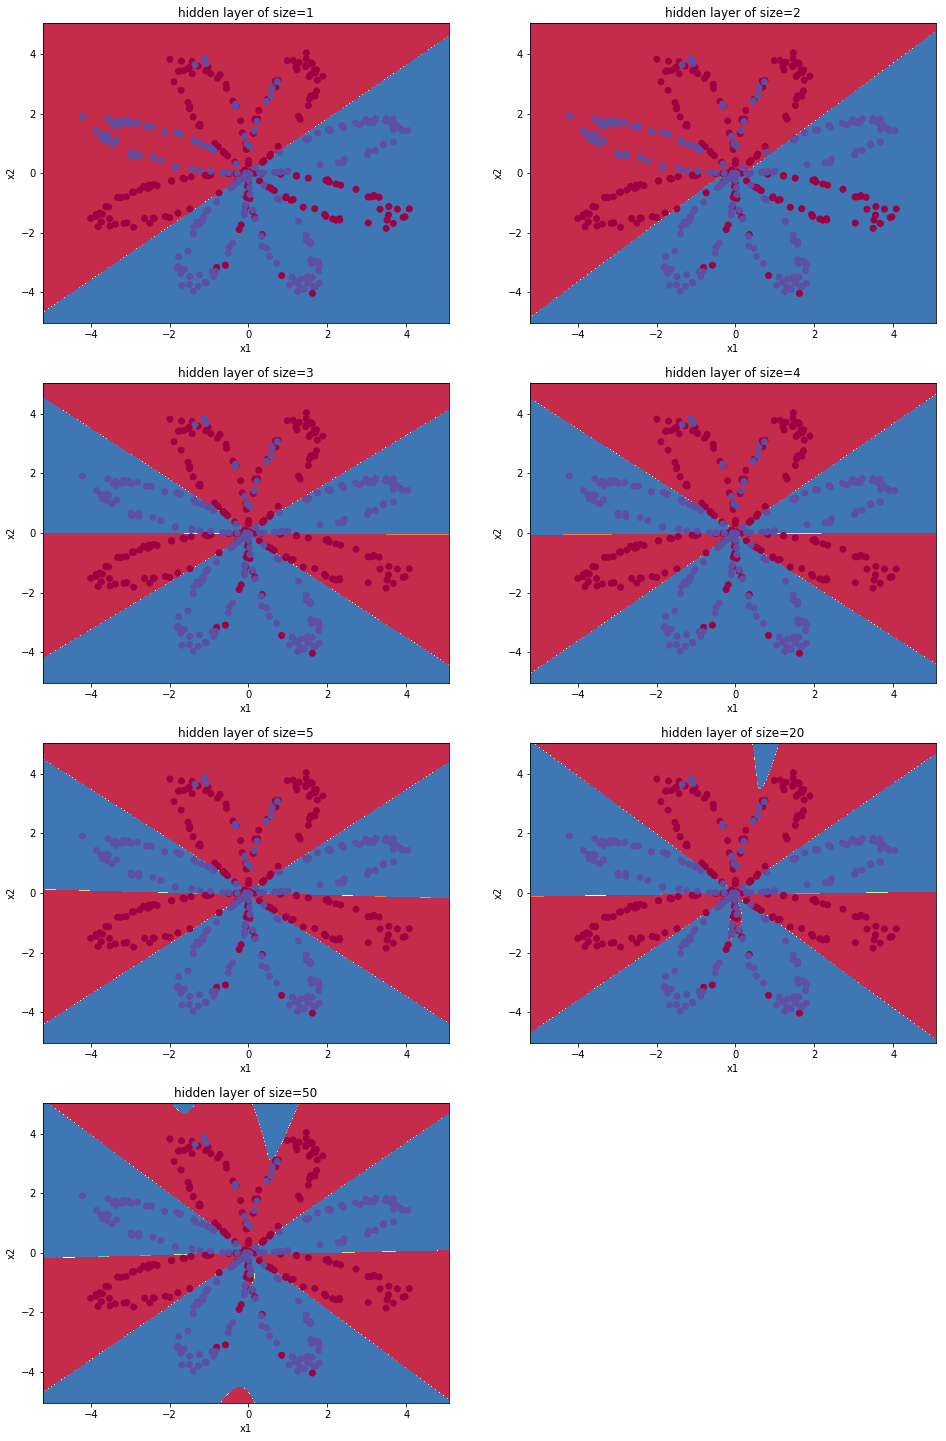

In [34]:
# 更改隐藏层结点数
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title("hidden layer of size=" + str(n_h))
    parameters = nn_model(X,Y,n_h,num_iterations=5000)
    plot_decision_boundary(lambda x:predict(parameters, x.T), X, Y)
    predictions = predict(parameters,X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
   
    print("隐藏层的节点数量：" + str(n_h) + "准确率: " + str(accuracy))

In [35]:
# 最好的隐藏层大小似乎在n_h = 5附近, 后面学习有关正则化的知识，它允许我们使用非常大的模型（如n_h = 50），而不会出现太多过度拟合。



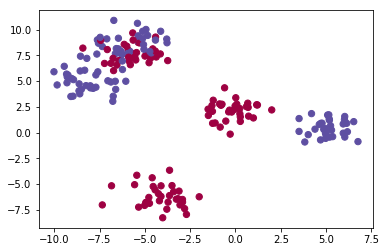

In [39]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "blobs"
X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])
if dataset == "blobs":
    Y = Y % 2
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)
